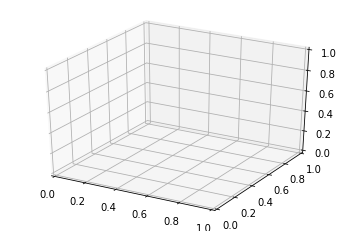

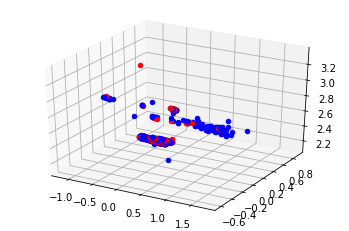

In [2]:
from sfm import *
I_1 = plt.imread('falcon/DSC03919.JPG')
I_2 = plt.imread('falcon/DSC03920.JPG')
I_3 = plt.imread('falcon/DSC03921.JPG')

x1_12, x2_12, P1, P2 = SIFT_stuff(I_1, I_2)
x2_23, x3_23, P2_2, P3_2 = SIFT_stuff(I_2, I_3)

P3 = np.vstack((P2, [0,0,0,1])) @ np.vstack((P3_2, [0,0,0,1]))

P3 = P3[:3]

shared_points = []
for a, b in zip(x2_23, x3_23):
    for c, d in zip(x1_12, x2_12):
        if (np.all(a == d)):
            shared_points.append([c, d, b])

shared_points = np.array(shared_points)

X_gcp = []  
for x1, x2, x3 in shared_points:
    p1 = triangulate(P1, P2, x1, x2)
    x = triangulate(P1, P2, x1, x2)
    x /= x[3]
    X_gcp.append(x[:3])

X_gcp = np.array(X_gcp)

P3_opt = optimize_pose(shared_points, X_gcp, P2, P3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for a, b in zip(x1_12, x2_12):
    vt = triangulate(P1, P2, a, b)
    vt /= vt[3]
    ax.scatter(vt[0], vt[1], vt[2], c='blue')

for a, b in zip(x2_23, x3_23):
    vt = triangulate(P2, P3_opt, a, b)
    vt /= vt[3]
    ax.scatter(vt[0], vt[1], vt[2], c='red')

plt.show()

In [2]:
"""
Seems to be working correctly, but the orientation of the plot is pretty bad here.
Run project_4.py to get the same plot outside of a notebook.
"""
